# Yanhong Simokat
# CSC 578 Section 910
# Final Project

## Table of contents:
----
* **Overview**

* **Imports (data and packages)**

* **Exploratory Data Analysis (EDA)**

* **Data Preprocessing**

* **Model Building**

* **Prediction**

## Overview

The purpose of this final project is to construct a prediction model using a neural network called a Long Short Term Memory (LSTM) network to forecast the temperature of the next hour based on the climate conditions and temperature over the last 24 hours. In this competition, we will use mean absolute error (MAE) to evaluate the model.

## Imports data and packages

In [1]:
# packages
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as k
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout, Embedding, Conv1D, MaxPooling2D, Flatten,Bidirectional
from keras import optimizers
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("climate_hour_train.csv", header=0)
train = train.drop('Date Time',axis=1)
train.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [4]:
test = pd.read_csv('climate_Xtest.csv',delimiter=',',header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,1007.19,2.06,274.65,1.89,98.8,7.09,7.00,0.09,4.34,6.95,...,92.0,6.83,6.29,0.55,3.91,6.27,1268.31,3.10,4.61,157.8
1,1007.06,2.22,274.82,2.06,98.9,7.17,7.09,0.08,4.39,7.04,...,89.8,6.94,6.23,0.71,3.88,6.22,1266.15,2.74,4.37,157.9
2,1007.43,2.04,274.61,1.87,98.8,7.08,6.99,0.08,4.33,6.94,...,89.8,6.91,6.20,0.70,3.86,6.20,1265.64,1.05,2.68,135.9
3,1007.87,1.79,274.34,1.63,98.8,6.95,6.87,0.08,4.25,6.82,...,88.9,6.98,6.20,0.77,3.87,6.20,1264.11,1.67,2.96,97.5
4,1007.79,2.12,274.66,1.99,99.1,7.12,7.05,0.06,4.36,7.00,...,81.6,7.27,5.93,1.34,3.70,5.94,1259.97,2.36,4.45,161.3


# EDA

In [5]:
train.shape,test.shape

((52566, 14), (17447, 336))

In [6]:
#basic statistics
train.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000
mean,988.723002,9.172795,283.254265,4.779049,76.444300,13.357483,9.458133,3.899249,5.977212,9.568031,1216.718989,2.142170,3.539017,173.689628
std,8.190684,8.533081,8.605048,6.922701,16.430164,7.572008,4.201679,4.723265,2.666892,4.253017,40.439912,1.530832,2.313246,87.251111
min,918.500000,-22.760000,250.850000,-24.800000,13.060000,0.970000,0.810000,0.000000,0.510000,0.810000,1066.190000,0.000000,0.000000,0.000000
25%,983.750000,3.110000,277.242500,0.130000,65.810000,7.640000,6.170000,0.810000,3.890000,6.240000,1188.082500,1.010000,1.800000,120.800000
50%,989.140000,9.310000,283.430000,5.200000,79.700000,11.740000,8.850000,2.090000,5.595000,8.965000,1213.440000,1.790000,3.000000,197.100000
75%,994.070000,15.280000,289.370000,10.030000,89.800000,17.390000,12.320000,5.130000,7.780000,12.450000,1243.050000,2.880000,4.750000,233.800000
max,1012.740000,35.480000,309.690000,22.940000,100.000000,57.800000,28.040000,41.710000,17.940000,28.530000,1392.560000,12.580000,20.330000,360.000000


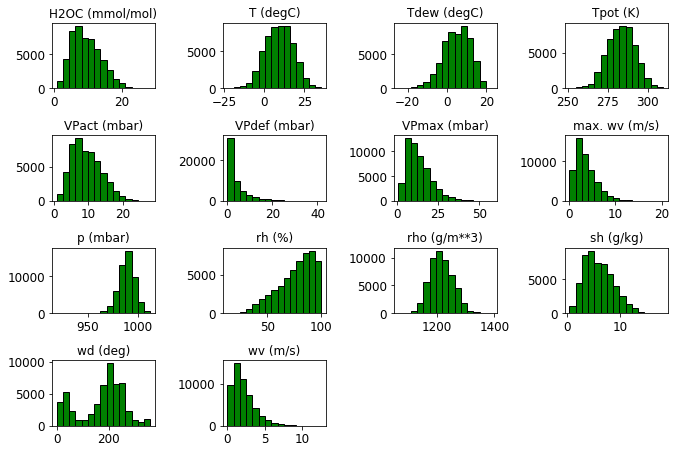

In [7]:
#Data visulizations
train.hist(bins=15, color='green', edgecolor='black', linewidth=1.0,
           xlabelsize=12, ylabelsize=12, grid=False)    
plt.tight_layout(rect=(0, 0, 1.6, 1.6)) 

By look at the distribution of each histogram, we see some skewness, kurtosis, so we should consider standarlize/normalize the data.

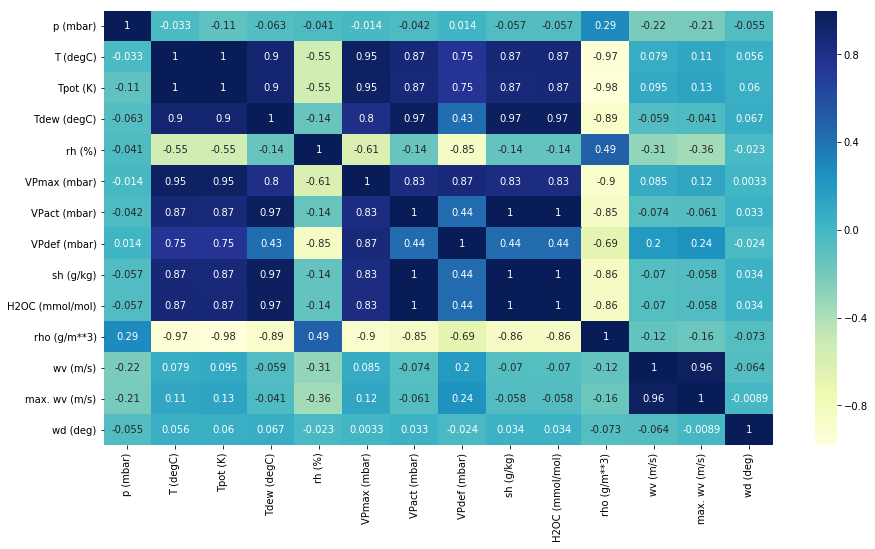

In [8]:
# visualize the correlation matrix using a heatmap in seaborn.
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),cmap="YlGnBu",annot=True)

there are some linear and nonlinear correlations among those variables. ex. correlation close to zero we can infer there is no linear relationship between that two predictors. 

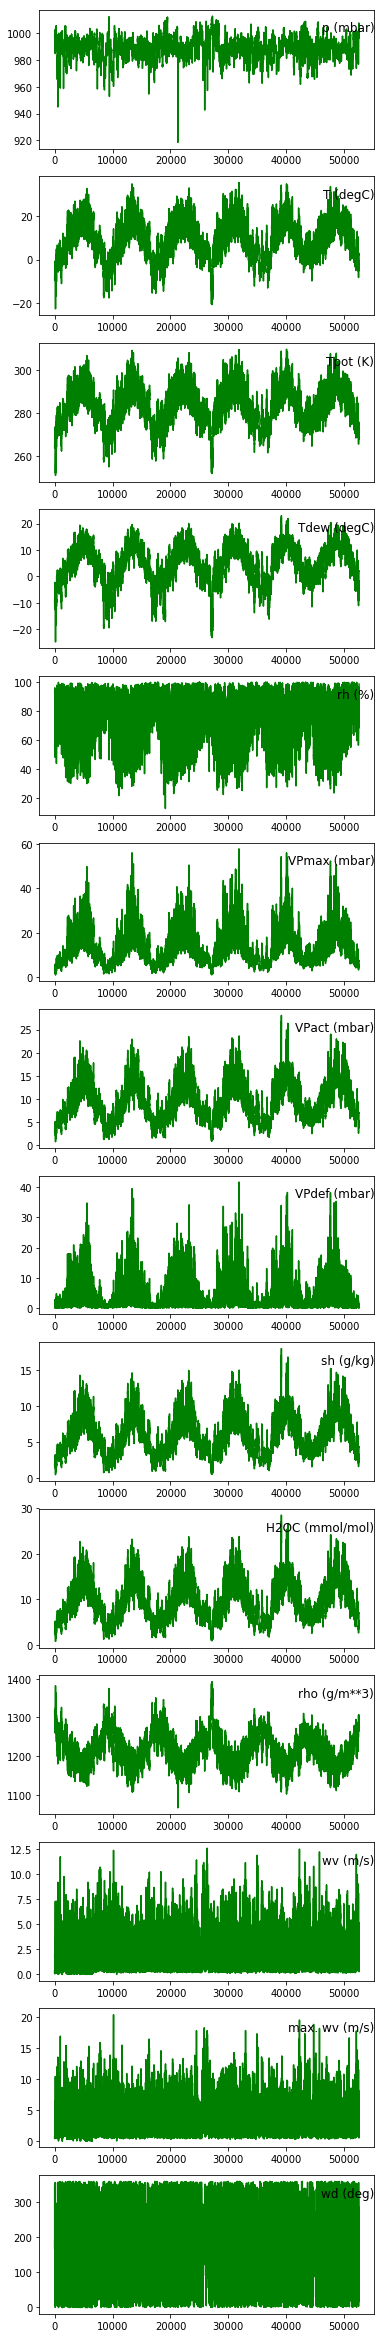

In [9]:
m = range(0,14)
i = 1
plt.figure()
for k in m:
    plt.subplot(len(m), 1, i)
    plt.subplots_adjust(top = 20, bottom = 12)
    plt.plot(train.values[:,k],'g-')
    plt.title(train.columns[k], y=0.8, loc='right')
    i += 1
plt.show()

The plot of the overall distribution of each feature tells me that there are some noises. 
Expecially the feature wd(deg), it does not give me any infomation since there is no pattern.

In [10]:
#check for missing value
train.isnull().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [11]:
sum(test.isnull().sum())

0

In [12]:
train.loc['01.01.2009 01:00:00': '02.01.2009 00:00:00'][:5]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)


In [13]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
count,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,...,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000
mean,990.674255,10.268305,284.194843,5.493638,74.781228,14.212427,9.763199,4.449185,6.159660,9.859409,...,74.756161,14.209485,9.759061,4.450384,6.157099,9.855310,1214.166601,0.374609,1.221725,178.703598
std,8.677147,8.007873,8.130922,6.077748,16.485300,8.168546,4.120036,5.343615,2.617216,4.171714,...,16.474393,8.171478,4.124520,5.342917,2.620029,4.176225,38.411623,131.145574,151.459368,84.617928
min,945.640000,-13.670000,259.150000,-15.300000,23.640000,2.120000,1.850000,0.020000,1.150000,1.840000,...,23.640000,2.120000,1.850000,0.020000,1.150000,1.840000,1103.790000,-9999.000000,-9999.000000,0.110000
25%,985.710000,3.945000,277.910000,0.510000,63.710000,8.105000,6.340000,1.050000,3.990000,6.400000,...,63.690000,8.100000,6.330000,1.050000,3.985000,6.390000,1185.770000,0.950000,1.720000,135.600000
50%,991.050000,9.740000,283.560000,5.250000,77.900000,12.080000,8.880000,2.450000,5.590000,8.950000,...,77.800000,12.080000,8.880000,2.460000,5.590000,8.950000,1215.090000,1.690000,2.880000,201.600000
75%,996.360000,15.970000,289.990000,10.200000,88.400000,18.180000,12.460000,5.730000,7.860000,12.570000,...,88.400000,18.180000,12.460000,5.730000,7.860000,12.570000,1241.925000,2.800000,4.720000,235.200000
max,1015.290000,37.280000,311.210000,19.780000,99.800000,63.770000,23.100000,46.010000,14.760000,23.510000,...,99.800000,63.770000,23.100000,46.010000,14.760000,23.510000,1348.150000,12.050000,18.670000,359.900000


In [14]:
train.shape

(52566, 14)

In [15]:
train.values[:,1]

array([-8.05, -8.88, -8.81, ...,  1.96,  1.94,  2.18])

# Data Preprocessing

Normalizing the values can reduce the noisy data, so we can have more accurate predications. 

In [16]:
train = train.values
train = train.astype('float32')

In [17]:
# normalize the dataset
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
train_norm = scaler.fit_transform(train)
test_norm = scaler.fit_transform(test)

In [18]:
train_norm.shape,test_norm.shape

((52566, 14), (17447, 336))

from pandas import Series
# create a differenced series
diff = (pd.DataFrame(train_norm)).diff()
m = range(0,14)
i = 1
plt.figure()
for k in m:
    plt.subplot(len(m), 1, i)
    plt.subplots_adjust(top = 20, bottom = 12)
    plt.plot((pd.DataFrame(train_norm)).values[:,k],'g-')
    plt.title((pd.DataFrame(train_norm)).columns[k], y=0.8, loc='right')
    i += 1
plt.show()

In [19]:
#Prepare the trainning data to be Keras RNN/-ready

In [20]:
#data: Sequence of observations as a list or 2D NumPy array. Required.
#n_in: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
#n_out: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.

def series_to_supervise(mat,lookback,future_step=1):
    '''
    Convert a Time Series to a Supervised Learning Problem
    --References:
    https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    '''
    n_vars = mat.shape[-1]
    df = pd.DataFrame(mat)

    cols,names = list(),list()
    #create input sequence (t-n,....,t-1)
    for i in range(lookback,0,-1):
        cols.append(df.shift(i))
        names+=[('var%d(t-%d)'%(j+1,i)) for j in range(n_vars)]
    #create forecast sequence (t,t+1,..,t+n)
    for i in range(0,future_step):
        cols.append(df.shift(-i))
        if i==0:
            names+=[('var%d(t)'%(j+1)) for j in range(n_vars)]
        else:
            names+=[('var%d(t+%d)'%(j+1,i)) for j in range(n_vars)]
    #concatenate all columns
    agg = pd.concat(cols,axis=1)
    agg.columns = names
    #drop nulls
    agg.dropna(inplace=True)
    #extract features and target variables and return these
    features = agg.iloc[:,:336]
    target = agg.iloc[:,337]
    return features,target

In [21]:
#Rows in xtrain that are short of 24 hours worth of information should be discarded. 
#You should get the xtrain's shape of 52542 * 336 (where 52542 = 52566 - 24, 336 = 14 * 24), 
#and ytrain's shape of 52542 * 1. 
#The first entry in xtrain spans from 01.01.2009 01:00:00 to 02.01.2009 00:00:00, both inclusive, 
#and the first entry in ytrain is the temperature of 02.01.2009 01:00:00.

In [22]:
#prepare the training data in timeseries format
xtrain,ytrain = series_to_supervise(train_norm,23,2)

In [23]:
xtest = test_norm

In [24]:
ytest = test.iloc[:,1]
ytest.head()

0    2.06
1    2.22
2    2.04
3    1.79
4    2.12
Name: 1, dtype: float64

In [25]:
ytest =scaler.fit_transform(ytest.values.reshape(-1,1))
ytest

array([[-1.02505876],
       [-1.00507785],
       [-1.02755638],
       ...,
       [-1.61074917],
       [-1.65445741],
       [-1.79307497]])

In [26]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((52542, 336), (52542,), (17447, 336), (17447, 1))

xtest = test_norm
xtest.shape

s = MinMaxScaler(feature_range=(0,1))
t = test.values[:,1].reshape(-1,1)
y_test = s.fit_transform(t)

In [27]:
test.values[:,1].shape

(17447,)

In [28]:
xtrain.shape,ytrain.shape

((52542, 336), (52542,))

In [29]:
xtest.shape

(17447, 336)

In [30]:
#reshape the data for LSTM
timesteps = 24
data_dim = 14
xtrain = np.array(xtrain).reshape(xtrain.shape[0],timesteps, data_dim)
xtest = np.array(xtest).reshape(xtest.shape[0],timesteps, data_dim)

In [31]:
ytrain = np.array(ytrain).reshape(-1,1)
ytest = np.array(ytest).reshape(-1,1)

In [32]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((52542, 24, 14), (17447, 24, 14), (52542, 1), (17447, 1))

# Model building

In [33]:
x_train = xtrain[:36780,:]
y_train = ytrain[:36780,:]
x_test = xtrain[36780:,:]
y_test = ytrain[36780:,:]

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((36780, 24, 14), (36780, 1), (15762, 24, 14), (15762, 1))

In [35]:
#kaggle: 1.80
import keras
from keras.callbacks import LearningRateScheduler
adam = keras.optimizers.Adam(lr = 0.001,decay=0.001)
model13 = Sequential()
model13.add(LSTM(60, input_shape=(timesteps, data_dim)))
#model13.add(Dropout(0.5))
model13.add(Dense(1))
model13.compile(loss='mae', optimizer= adam)


model13.summary()

history13 = model13.fit(x_train, y_train, epochs=20,batch_size=64, validation_data=(x_test,y_test),verbose=1,shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60)                18000     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 18,061
Trainable params: 18,061
Non-trainable params: 0
_________________________________________________________________
Train on 36780 samples, validate on 15762 samples
Epoch 1/20
36780/36780 [==============================] - 22s 592us/step - loss: 0.1413 - val_loss: 0.0811
Epoch 2/20
36780/36780 [==============================] - 21s 580us/step - loss: 0.0773 - val_loss: 0.0710
Epoch 3/20
36780/36780 [==============================] - 20s 554us/step - loss: 0.0685 - val_loss: 0.0649
Epoch 4/20
36780/36780 [==============================] - 20s 534us/step - loss: 0.0632 - val_loss: 0.0624
Epoch 5/20
36780/36780 [==============================] 

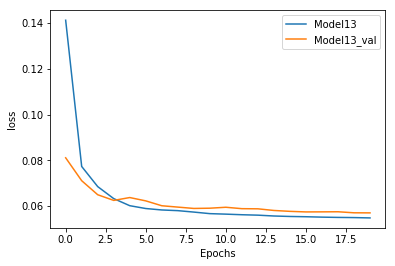

In [36]:
# plt.plot(history.epoch,history.history['loss'],label='Model')
#plt.plot(history1.epoch,history1.history['loss'],label='Model1')
#plt.plot(history12.epoch,history12.history['loss'],label='Model12')
plt.plot(history13.epoch,history13.history['loss'],label='Model13')
plt.plot(history13.epoch,history13.history['val_loss'],label='Model13_val')
#plt.plot(history4.epoch,history11.history['loss'],label='Model4')
#plt.plot(history5.epoch,history12.history['loss'],label='Model5')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [49]:
#top model architecture, model13

# Predictions and rescale

In [57]:
pred = model13.predict(xtest)

In [58]:
pred

array([[-1.0737066],
       [-1.030242 ],
       [-1.042877 ],
       ...,
       [-1.7458566],
       [-1.6379874],
       [-1.8194832]], dtype=float32)

In [59]:
#re-scale the predictions back to the original scale.
from sklearn.preprocessing import StandardScaler
pred = scaler.inverse_transform(pred)
pred

array([[ 1.6704448],
       [ 2.0184948],
       [ 1.9173187],
       ...,
       [-3.7118928],
       [-2.8481138],
       [-4.3014674]], dtype=float32)

In [60]:
ytest = scaler.inverse_transform(ytest)

In [61]:
ytest

array([[ 2.06],
       [ 2.22],
       [ 2.04],
       ...,
       [-2.63],
       [-2.98],
       [-4.09]])

# MAE

In [62]:
#mae
mean_absolute_error(ytest,pred)

2.52343907680717

# Write the result to csv file

In [63]:
sample =pd.read_csv('sample_submission_2019spring.csv')
sample.head()

,date time,temperature
0,02.01.2015 00:00:00,1.580910
1,02.01.2015 01:00:00,1.975897
2,02.01.2015 02:00:00,1.860563
3,02.01.2015 03:00:00,2.074087
4,02.01.2015 04:00:00,2.882853


In [64]:
df = pd.DataFrame(pred)
df.insert(0,'date time',sample.iloc[:,0])
df.columns=['date time','temperature']

In [65]:
df.head()

,date time,temperature
0,02.01.2015 00:00:00,1.670445
1,02.01.2015 01:00:00,2.018495
2,02.01.2015 02:00:00,1.917319
3,02.01.2015 03:00:00,2.113369
4,02.01.2015 04:00:00,2.754849


In [66]:
df.to_csv('submission2.csv',index=False)